## <span style="color:#000080"> **Análise Exploratória e Qualidade dos Dados**

### <span style="color:#4169E1"><b>1.1 Definição de pronto:</span> Dados analisados e insights documentados

### <span style="color:#4169E1"><b>1.2 Definição de entregue:</span> Notebook executando sem erros
### .....................................................................................................................

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.preprocessing as sklpp
import geopandas as gp

pd.set_option("display.precision", 4)

import warnings
warnings.filterwarnings("ignore")

d:\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


<b>Numpy</b> é uma biblioteca que é usada principalmente para realizar cálculos em Arrays Multidimensionais. 
<br>O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos

<b>Pandas</b> é uma biblioteca de software utilizada para manipulação e análise de dados. 
<br>Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais.

<b>Matplotlib</b> é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, <br>
feita para e da linguagem de programação Python e sua extensão de matemática NumPy.

<b>Pyplot</b> é um módulo do Matplotlib que oferece uma interface semelhante ao MATLAB.
<br>Matplotlib é projetado e desenvolvido para ter a mesma usabilidade do MATLAB, mas com a flexibilidade da linguagem Python.

<b>Sklearn</b> (conhecida como scikit-learn) é uma biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados.
<br>Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

<b>GeoPandas</b> é uma biblioteca para adicionar suporte a dados geográficos para objetos pandas.
<br> Seu objetivo é facilitar o trabalho com dados geoespaciais em python, fornecendo operações geoespaciais em pandas e uma interface de alto nível para múltiplas geometrias para ter forma. (Pre-requisito nesta ordem: shapely pyproj rtree GDAL  fiona pygeos )

<b>Seaborn</b> é uma biblioteca que atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada. 

### ***A) Importar Dados de Chuvas, Pressao, Precipitação e Temperatura***

In [2]:
# Carga do arquivo csv preparada para a análise exploratória de dados. Ajustes de separador, primeira coluna como índice e parse de Data.
source_file = '../../../../PrevisaoVento/Data/process/cenario3/dados_cenario3.csv'

df_patio = pd.read_csv(source_file, delimiter=';', index_col=0, parse_dates=['Data'])

### <span style="color:#006400"> **B) Análise sobre os Dados**

#### <span style="color:#228B22">B1. Verificação de formato dos dados. 5 registros.

In [3]:
df_patio.head(5)

,Longitude,Latitude,Data,VentoC
0,-42.75,-14.25,2017-01-01 00:00:00,9.815
1,-42.75,-14.25,2017-01-01 01:00:00,8.735
2,-42.75,-14.25,2017-01-01 02:00:00,8.454
3,-42.75,-14.25,2017-01-01 03:00:00,9.178
4,-42.75,-14.25,2017-01-01 04:00:00,9.186


#### <span style="color:#228B22"> B2. Verificação de nulidade e tipos de dados. 

In [4]:
df_patio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Longitude  8808 non-null   float64       
 1   Latitude   8808 non-null   float64       
 2   Data       8808 non-null   datetime64[ns]
 3   VentoC     8808 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 344.1 KB


#### <span style="color:#228B22">**B3. Estatísticas Gerais**

- A mínima e a máxima são os valores nos “extremos” de um conjunto de dados ordenados: ou seja, o menor e o maior valor. Ambos são utilizados cotidianamente e facilmente compreensíveis
- A média consiste na soma dos valores dividido pelo número de observações. 
- A mediana, o valor que está no meio deste conjunto de dados ordenados.
<br><br>
Enquanto a média leva em consideração todos os valores e é afetada pelos outliers, a mediana ordena os valores de forma crescente e busca por aquele que está no meio.

#### <span style="color:#006400">**B3.1 Variaveis Contínuas**

In [5]:
df_patio.describe(include=[np.number])

,Longitude,Latitude,VentoC
count,8808.00,8808.00,8808.0000
mean,-42.75,-14.25,7.9796
std,0.00,0.00,2.7926
min,-42.75,-14.25,0.7840
25%,-42.75,-14.25,6.0540
50%,-42.75,-14.25,8.1365
75%,-42.75,-14.25,9.8685
max,-42.75,-14.25,16.9370


##### <span style="color:#006400">**B3.2 Variaveis Categóricas**

In [6]:
df_patio.describe(exclude=[np.number])

,Data
count,8808
unique,8808
top,2017-02-22 04:00:00
freq,1
first,2017-01-01 00:00:00
last,2018-01-02 23:00:00


#### <span style="color:#228B22">B4. Variação Dinâmica das Variáveis Contínuas

In [7]:
for (column, _ ) in df_patio.filter(items=['VentoC']).items():
    print(f'{column} \t faixa dinâmica: {"{:.2f}".format(df_patio[column].max() - df_patio[column].min())}')

VentoC 	 faixa dinâmica: 16.15


### <span style="color:#006400"> **C) Visualização Gráfica - Mapa**

#### <span style="color:#228B22">C1. Criando informação de ponto geométrico 

In [8]:
df_patio_coord = pd.read_csv('../../../../PrevisaoVento/Data/raw/eolica/00_cadastro_patio.txt', delimiter=';', index_col=0)
df_patiog = gp.GeoDataFrame(df_patio_coord, geometry=gp.points_from_xy(df_patio_coord.Longitude, df_patio_coord.Latitude))

# df_patiog = gp.GeoDataFrame(df_patio, geometry=gp.points_from_xy(df_patio.Longitude, df_patio.Latitude))
# df_patiog.head(5)

#### <span style="color:#228B22">C2. Plotando o ponto no mapa >>> Achar shape dos estados do Brasil onde os pontos serão mostrados <<<

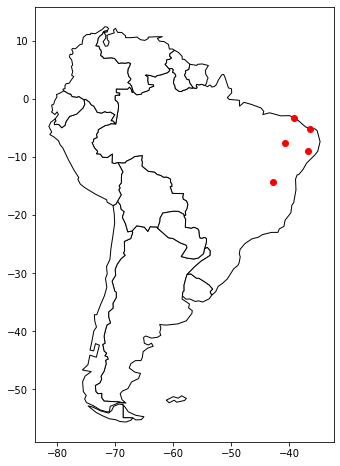

In [9]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# Restrito para América do Sul
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black',figsize=(10, 8))

# Plotando o gráfico.
df_patiog.plot(ax=ax, color='red')

plt.show()

### <span style="color:#006400"> **D) Visualização Gráfica - Histograma**

#### <span style="color:#228B22"> **D1. Histogramas com as distribuições das variáveis**

<b>Histograma</b> é um gráfico que mostra a distribuição de acontecimentos registrados em todo o espectro. Graficamente é um conjunto de retângulos 
que têm as bases sobre o eixo x e a área proporcional às frequências de classe. Fatores a serem analisados:
<p>
<b>1. Amplitude:</b><br>
- Quantas amostras representam determinado comportamento? <br>
- A distribuição é mais homogênea entre as classes, ou as amostras se concentram em determinada região? <br>
<b>2.Mediana:</b><br>
- Qual é o ponto central onde, estatisticamente, existe o maior registro de ocorrências?<br>
<b>3.Dispersão:</b><br>
- Qual é o grau de variedade de classes que existem no meu sistema?<br>
- Existem amostras distribuídas entre muitos grupos no meu gráfico?

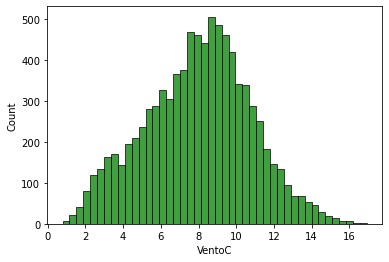

<Figure size 432x288 with 0 Axes>

In [10]:
for (column, _ ) in df_patio.filter(items=['VentoC']).items():
    sns.histplot(df_patio[column], color='green')
    plt.figure()

#### <span style="color:#228B22">**D2. Utilizando KDE - Kernel Density Estimate**

https://www.youtube.com/watch?v=DCgPRaIDYXA<br>
O gráfico KDE descrito como estimativa de densidade do kernel é usado para visualizar a densidade de probabilidade de uma variável contínua.
<p>
Um histograma é basicamente um gráfico de barras para variáveis quantitativas, que são divididas em intervalos, e nos mostra a frequência de dados que se tem em cada intervalo; o KDE é uma estimativa da densidade desses dados, calculando a probabilidade de se ter um ponto naquele local do gráfico.

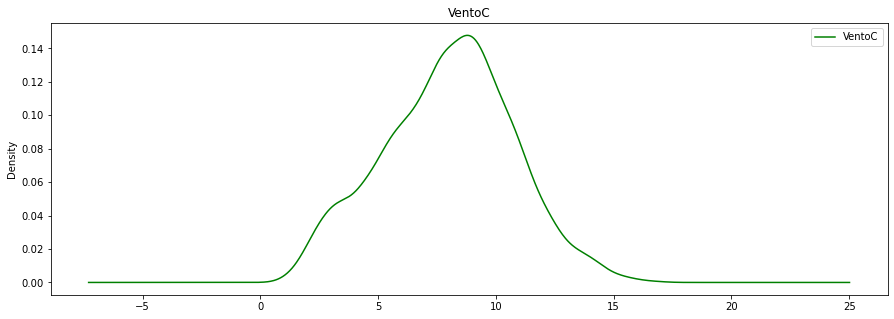

In [11]:
for (column, _ ) in df_patio.filter(items=['VentoC']).items():
    plt.figure()
    df_patio[column].plot.kde(figsize=(15,5), legend=True,color='#008000');
    plt.legend(ncol = 1)
    plt.title(column)

### <span style="color:#006400"> **G) Visualização Gráfica - Box Plot (Diagrama de Caixa)**

Na estatística, o Boxplot, ou diagrama de caixa, é uma maneira gráfica de representar a alteração dos dados de uma variável por meio de quartis. É um método alternativo ao histograma e ao "ramo-e-folha" para representar os dados.
<p>
O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes). Embora o Boxplot forneça informação sobre localização e dispersão, seu verdadeiro valor está na informação que fornece sobre a cauda da distribuição.
<p>
Em um boxplot são apresentadas 5 estatísticas: o mínimo, o primeiro quartil (Q1), a mediana, o terceiro quartil (Q3) e o máximo. Esses valores também são chamados de resumo dos cinco números. Para construir um desenha-se um retângulo alinhado verticalmente (ou horizontalmente) com duas semirretas, uma em cada um dos lados opostos do retângulo.

A altura do retângulo é definida pelos quartis Q1 e Q3. Uma linha secciona o retângulo no valor da mediana (ou Q2). As semirretas ligam respectivamente os quartis Q1 e Q3 ao valor mínimo e ao máximo do conjunto de dados.

In [12]:
# from IPython.display import Image
# Image(filename='boxplot.jpg')

- O centro da distribuição é indicado pela linha da mediana, no centro do quadrado.
- A dispersão é representada pela amplitude do gráfico, que pode ser calculada como máximo valor – mínimo valor. Quanto maior for a amplitude, maior a variação nos dados.
- O retângulo contém 50% dos valores do conjunto de dados. A posição da linha mediana no retângulo informa sobre a assimetria da distribuição.
- Uma distribuição simétrica teria a mediana no centro do retângulo. Se a mediana é próxima de Q1, então, os dados são positivamente assimétricos.Se a mediana é próxima de Q3 os dados são negativamente assimétricos. 
- Os outliers em um box plot aparecem como pontos ou asteriscos fora das “linhas” desenhadas e indicam possíveis valores discrepantes.
- Caudas – As linhas que vão do retângulo até aos outliers podem fornecer o comprimento das caudas da distribuição. Os outliers serão os valores fora de Limite Inferior = Q1-1.5*(Q3-Q1) e Limite Superior = Q3+1.5*(Q3 -Q1).


In [13]:
df_patio.describe(include=[np.number])

,Longitude,Latitude,VentoC
count,8808.00,8808.00,8808.0000
mean,-42.75,-14.25,7.9796
std,0.00,0.00,2.7926
min,-42.75,-14.25,0.7840
25%,-42.75,-14.25,6.0540
50%,-42.75,-14.25,8.1365
75%,-42.75,-14.25,9.8685
max,-42.75,-14.25,16.9370


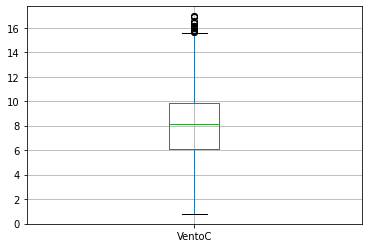

In [14]:
# Avaliar o grau de espalhamento de dados (dispersão) em torno da medida de centralidade
for (column, _ ) in df_patio.filter(items=['VentoC']).items():
    plt.figure()
    df_patio.boxplot(column = column);
    #plt.title(column)

### <span style="color:#D2691E"> **H) Normalização dos dados por Mínimo e Máximo**

<b>Normalizar</b> é uma técnica que visa transformar todas as variáveis na mesma ordem de grandeza e tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.<p>
   <i>Formula: Xnorm = (X - Xmin) / (Xmax - Xmin)</i><p>
       
Observação:Se a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.

#### <span style="color:#A0522D">H1. Usando MinMaxScaler para normalizar cada coluna

In [15]:
min_max_scaler = sklpp.MinMaxScaler()

df_patio_filtrado = df_patio.filter(items=['Pressao','Temperatura','VentoC'])

df_patio_normalizado = min_max_scaler.fit_transform(df_patio_filtrado)
df_patio_normalizado = pd.DataFrame(df_patio_normalizado)

# scikit learn retira as colunas do dataframe modificado. Colocando-as de volta
df_patio_normalizado.columns = df_patio_filtrado.columns

# visualização da normalização
df_patio_normalizado.head()

,VentoC
0,0.5591
1,0.4922
2,0.4748
3,0.5197
4,0.5202


#### <span style="color:#A0522D">**H2.Grafico Paiplot com Valores Normalizados**

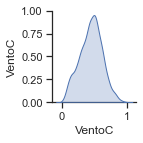

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_patio_normalizado, diag_kind="kde", kind="reg", height=2.0, plot_kws={'line_kws':{'color':'#008000'}, 
                           'scatter_kws': { 'color': '#D2B48C','edgecolor': 'w','alpha': 0.5}}) 

#### <span style="color:#A0522D">**H2.Grafico BoxPlot com Valores Normalizados**

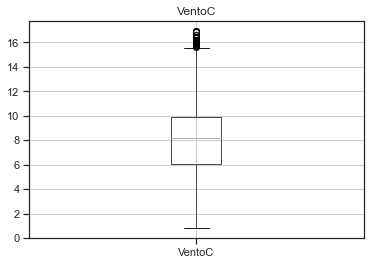

In [17]:
for (column, _ ) in df_patio_normalizado.items():
    plt.figure()
    df_patio.boxplot(column = column);
    plt.title(column)